In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()

<ipython-input-2-c977202eb7ed>:2: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


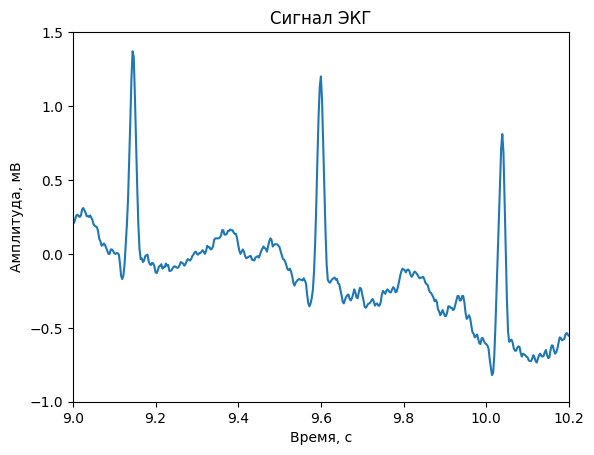

In [3]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.title("Сигнал ЭКГ")
plt.xlabel("Время, с")
plt.ylabel("Амплитуда, мВ")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

In [5]:
def custom_filter(data, time, alpha=0.7, beta=0.00001):
    filtered_data = [data[0]]
    derivative_prev = 0

    for i in range(1, len(time)):
        delta_t = time[i] - time[i-1]
        alpha_delta = alpha * (data[i] - filtered_data[-1])
        beta_delta = beta * (data[i] - derivative_prev)

        filtered_value = filtered_data[-1] + alpha_delta
        derivative = derivative_prev + beta_delta / delta_t
        filtered_value += delta_t * derivative

        filtered_data.append(filtered_value)
        derivative_prev = derivative

    return filtered_data

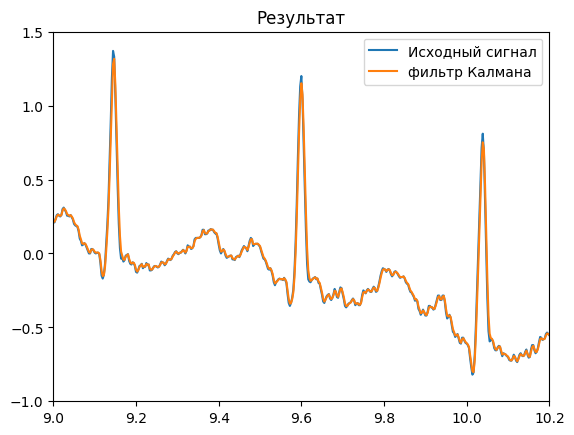

In [6]:
filtered_data = custom_filter(ecg, time)
plt.title("Результат")
plt.plot(time, ecg, label="Исходный сигнал")
plt.plot(time, filtered_data, label="фильтр Калмана")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.legend()